
# **TASK3: SALES PREDICTION USING PYTHON**

In [1]:
# importing necessary library
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Loading Advertising data from a CSV file
data = pd.read_csv('Advertising.csv')

In [3]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
# Separate features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Use actual column names from the DataFrame
y = data['Sales']

In [5]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (160, 3), Test set shape: (40, 3)


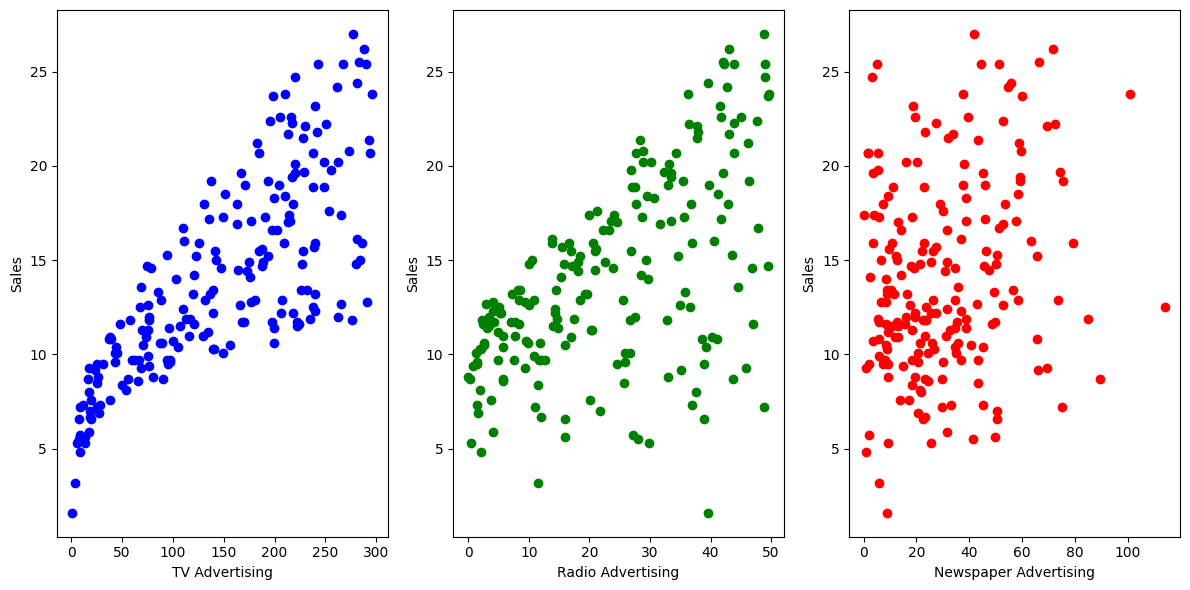

In [8]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(data['TV'], data['Sales'], color='blue')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(data['Radio'], data['Sales'], color='green')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

plt.subplot(133)
plt.scatter(data['Newspaper'], data['Sales'], color='red')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

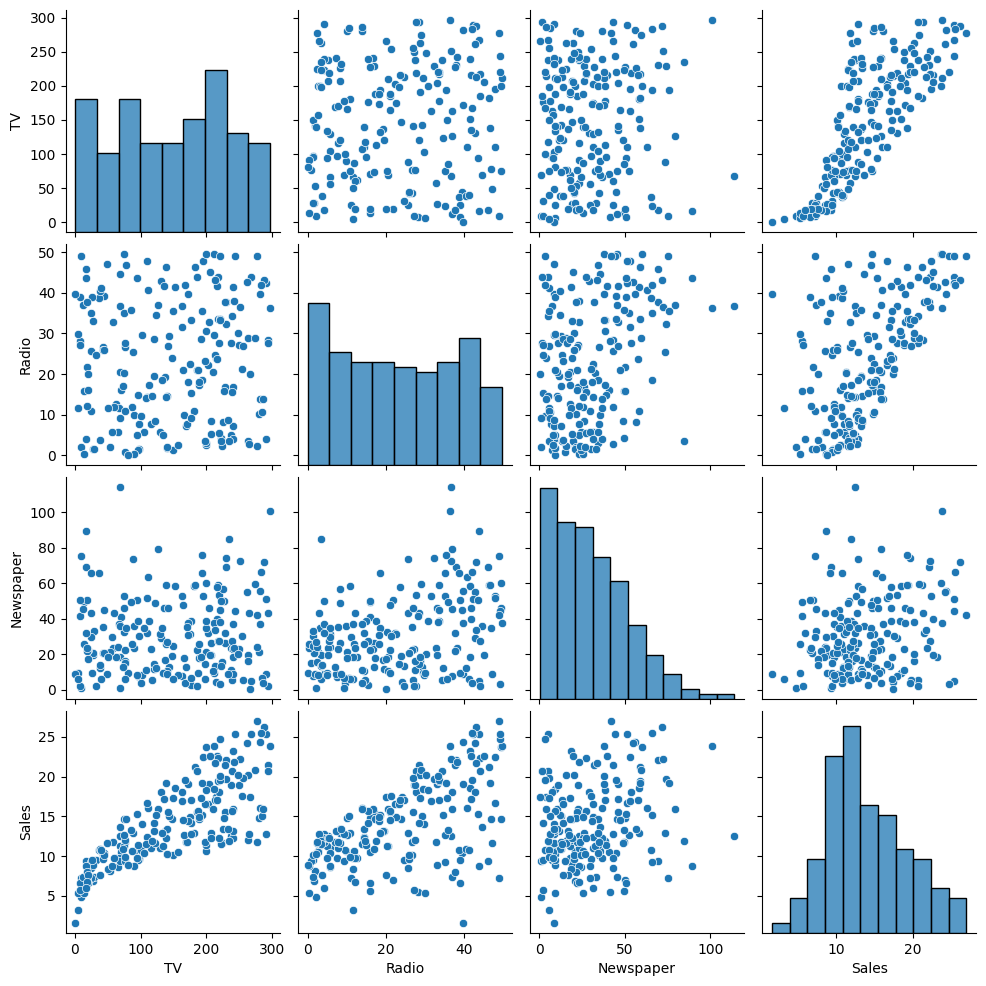

In [9]:
import seaborn as sns
# Pairplot
sns.pairplot(data, vars=['TV', 'Radio', 'Newspaper', 'Sales'], kind='scatter')
plt.show()

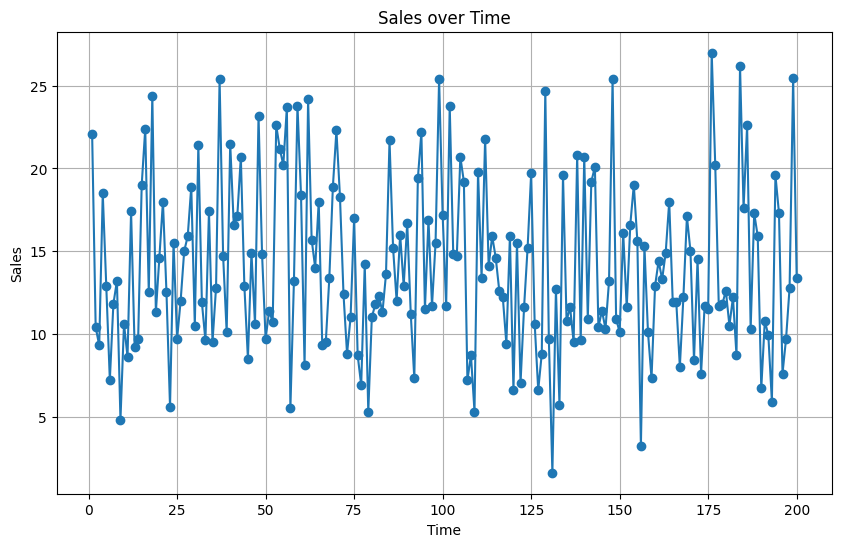

In [10]:
# Line plot with markers
plt.figure(figsize=(10, 6))
plt.plot(data['Unnamed: 0'], data['Sales'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.grid(True)
plt.show()

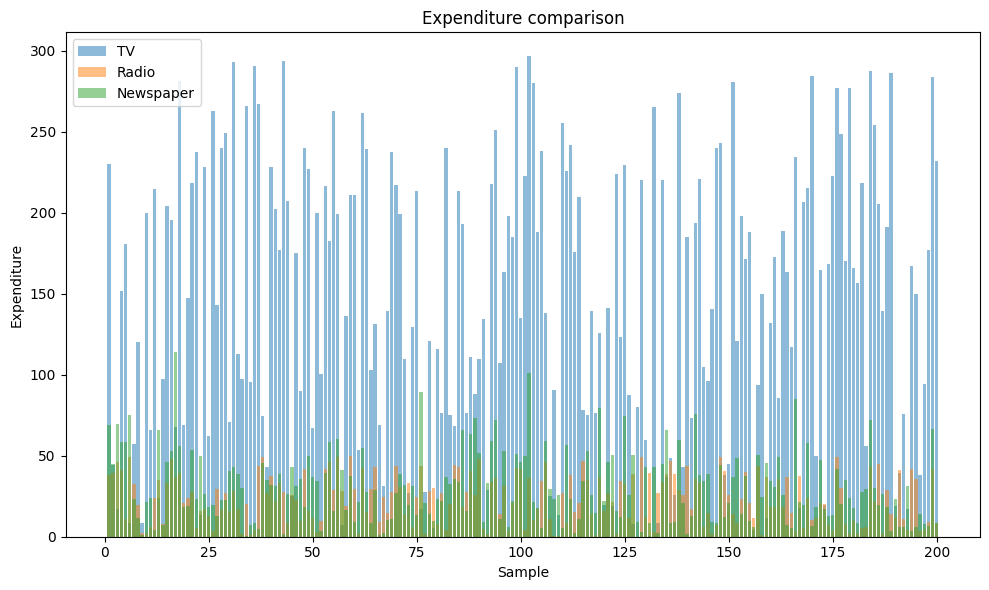

In [11]:
# Bar plot
plt.figure(figsize=(10, 6))

plt.bar(data['Unnamed: 0'], data['TV'], label='TV', alpha=0.5)
plt.bar(data['Unnamed: 0'], data['Radio'], label='Radio', alpha=0.5)
plt.bar(data['Unnamed: 0'], data['Newspaper'], label='Newspaper', alpha=0.5)

plt.xlabel('Sample')
plt.ylabel('Expenditure')
plt.title('Expenditure comparison')
plt.legend()

plt.tight_layout()
plt.show()

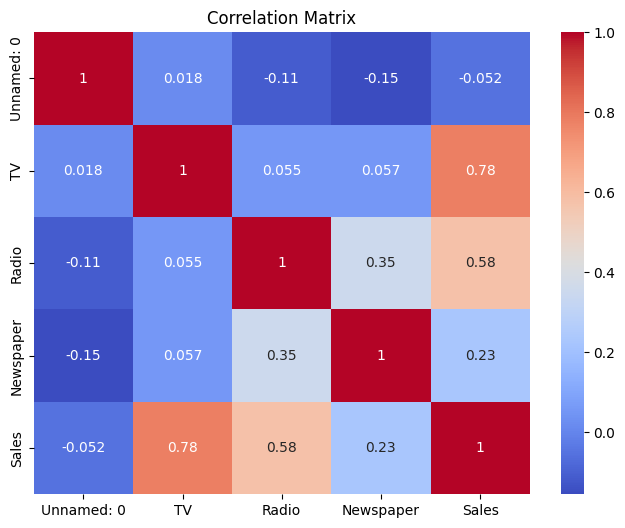

In [12]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

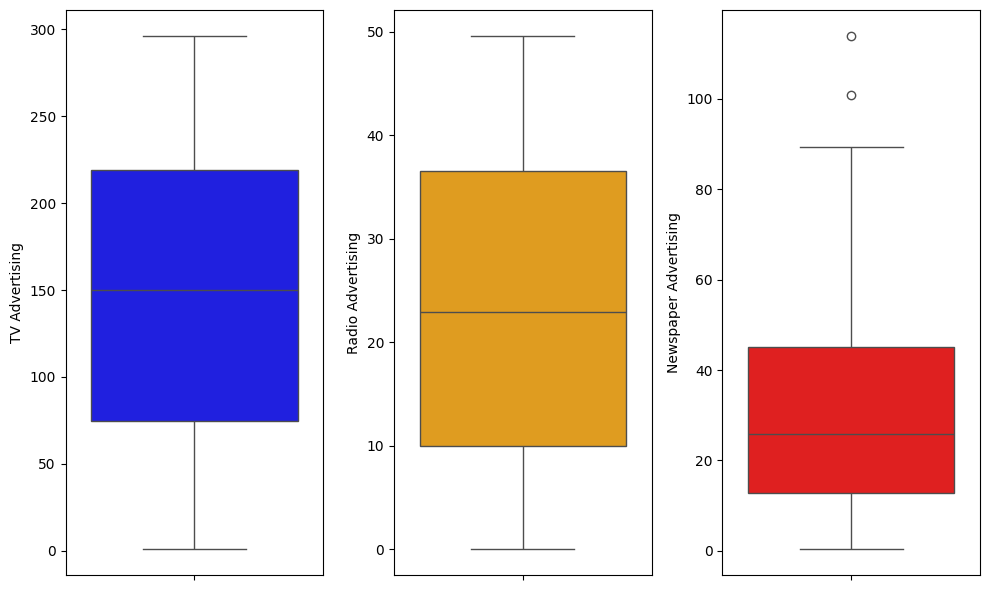

In [13]:
# Box plot
plt.figure(figsize=(10, 6))

plt.subplot(131)
sns.boxplot(y=data['TV'], color='blue')
plt.ylabel('TV Advertising')

plt.subplot(132)
sns.boxplot(y=data['Radio'], color='orange')
plt.ylabel('Radio Advertising')

plt.subplot(133)
sns.boxplot(y=data['Newspaper'], color='red')
plt.ylabel('Newspaper Advertising')

plt.tight_layout()
plt.show()

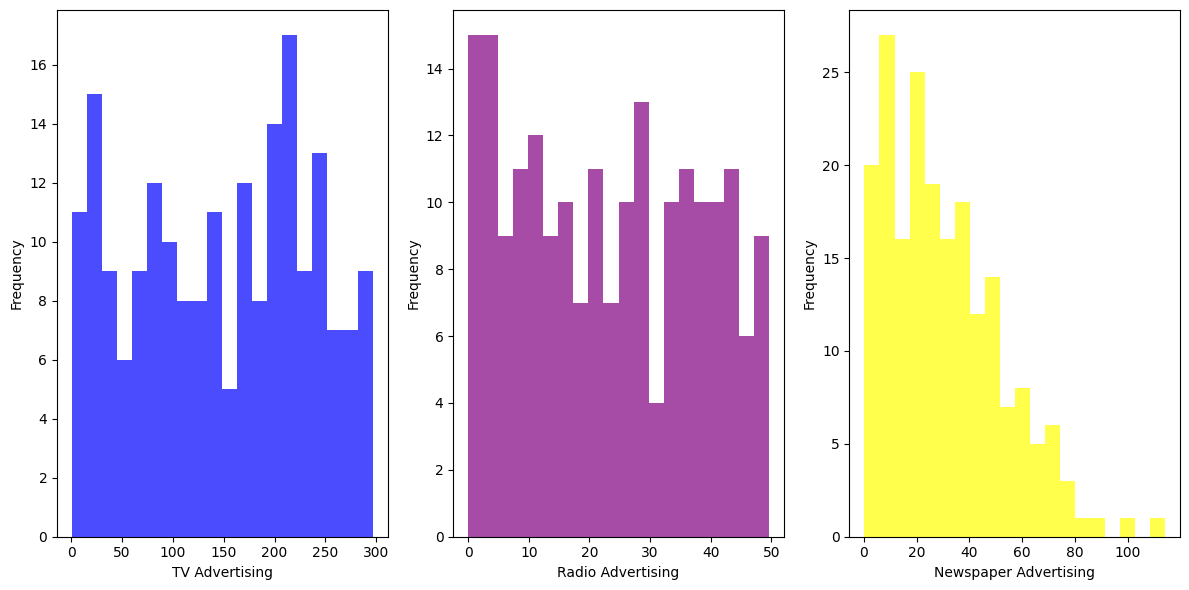

In [14]:
# Histogram
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(data['TV'], bins=20, color='blue', alpha=0.7)
plt.xlabel('TV Advertising')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(data['Radio'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Radio Advertising')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(data['Newspaper'], bins=20, color='yellow', alpha=0.7)
plt.xlabel('Newspaper Advertising')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

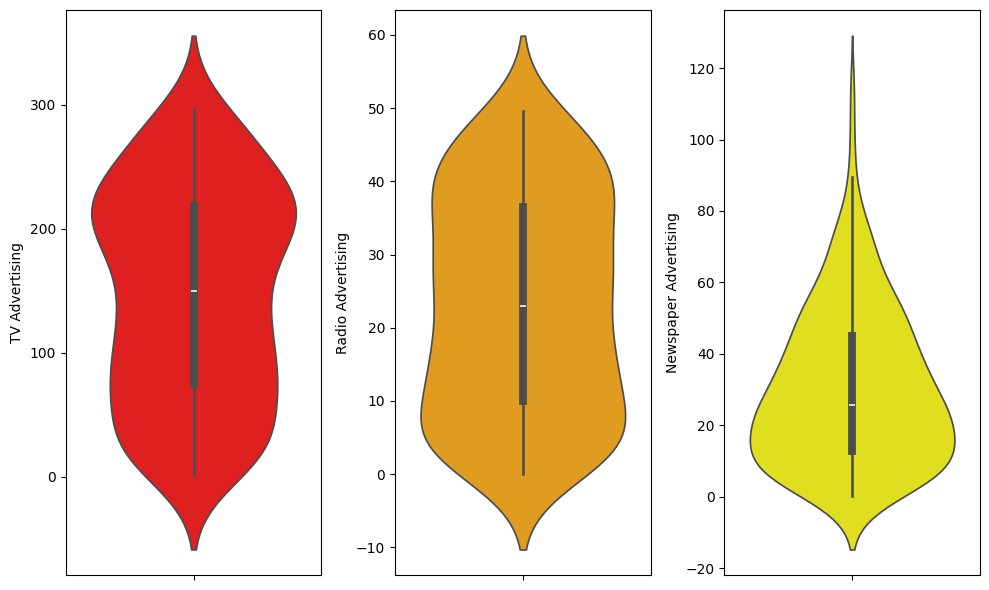

In [15]:
# violin plot
plt.figure(figsize=(10, 6))

plt.subplot(131)
sns.violinplot(y='TV', data=data, color='red')
plt.ylabel('TV Advertising')

plt.subplot(132)
sns.violinplot(y='Radio', data=data, color='orange')
plt.ylabel('Radio Advertising')

plt.subplot(133)
sns.violinplot(y='Newspaper', data=data, color='yellow')
plt.ylabel('Newspaper Advertising')

plt.tight_layout()
plt.show()

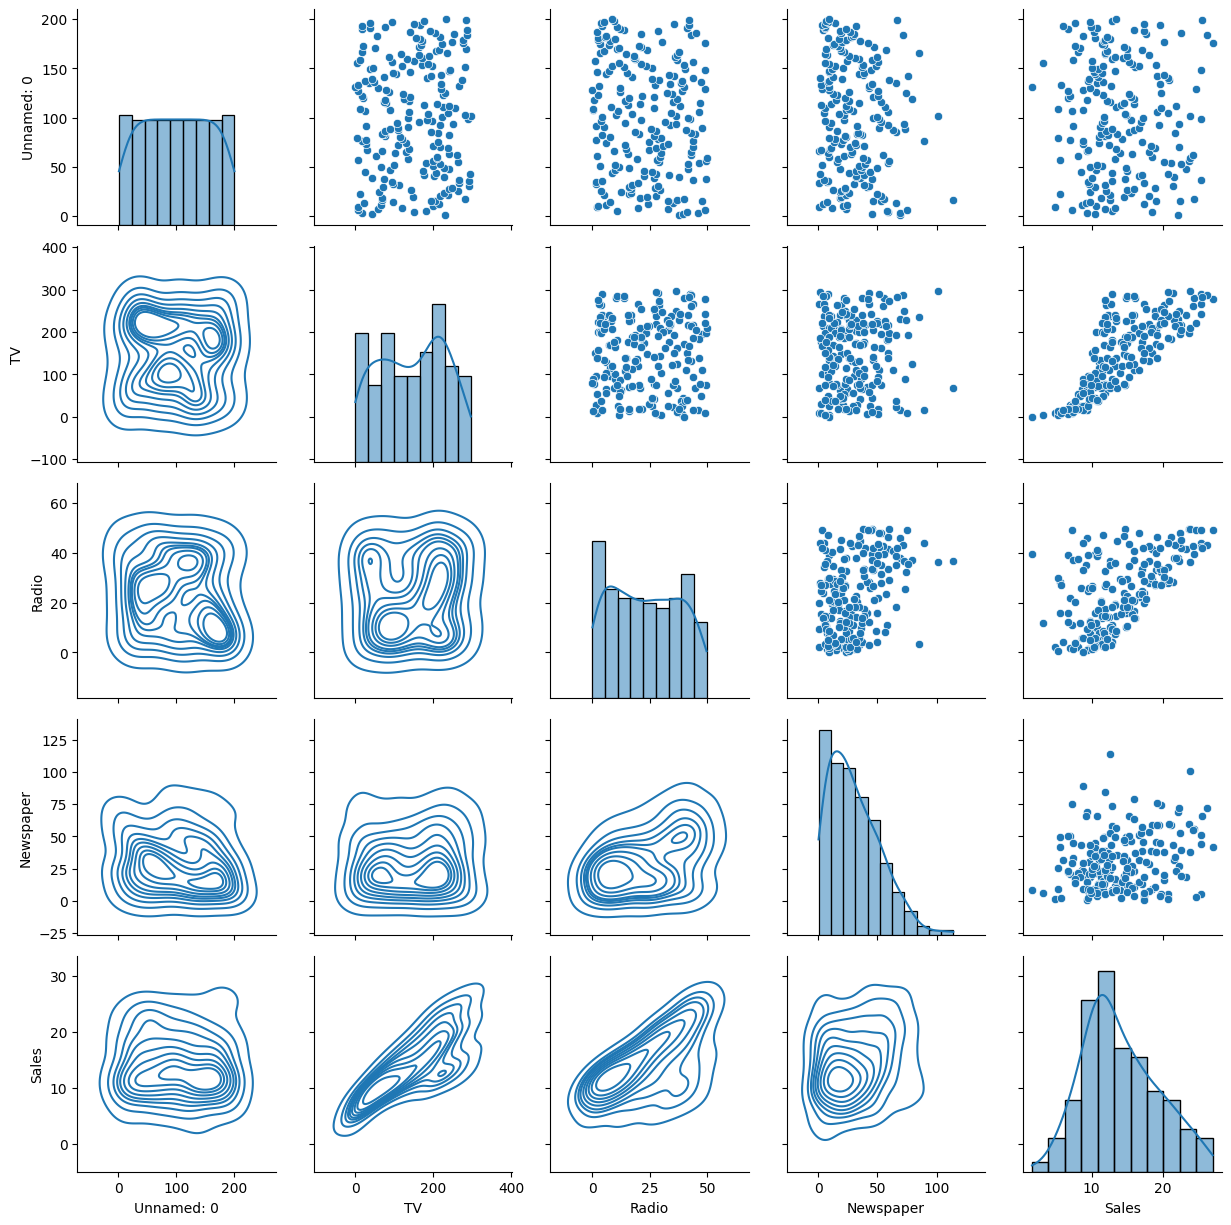

In [16]:
# Pair grid plot
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)

plt.show()

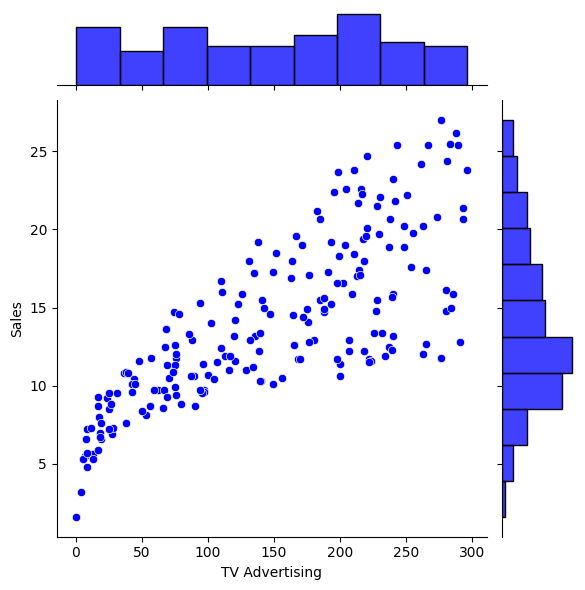

In [17]:
# joint plot
sns.jointplot(x='TV', y='Sales', data=data, kind='scatter', color='blue')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

**Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Initializing the Linear Regression model
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Printing the coefficients and intercept of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
# Making predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Calculating Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 3.1740973539761033


In [25]:
# Predict sales for new data
new_data = pd.DataFrame({
    'TV': [10000, 15000],
    'Radio': [0, 0],
    'Newspaper': [0, 0]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:")
for i, pred in enumerate(predicted_sales):
    print(f"Prediction {i+1}: {pred}")

Predicted Sales:
Prediction 1: 450.27424202528584
Prediction 2: 673.9218293688675


**Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Initialize and train the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt}")

# Step 3: Predict sales for new data
predicted_sales_dt = model_dt.predict(new_data)
print("Decision Tree - Predicted Sales:")
for i, pred in enumerate(predicted_sales_dt):
    print(f"Prediction {i+1}: {pred}")

Decision Tree - Mean Squared Error (MSE): 2.175
Decision Tree - Predicted Sales:
Prediction 1: 11.8
Prediction 2: 11.8


**Random Forest**

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")

# Step 3: Predict sales for new data
predicted_sales_rf = model_rf.predict(new_data)
print("Random Forest - Predicted Sales:")
for i, pred in enumerate(predicted_sales_rf):
    print(f"Prediction {i+1}: {pred}")


Random Forest - Mean Squared Error (MSE): 0.5907322499999988
Random Forest - Predicted Sales:
Prediction 1: 12.046999999999986
Prediction 2: 12.046999999999986


**Gradient Boosting**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 1: Initialize and train the Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")

# Step 3: Predict sales for new data
predicted_sales_gb = model_gb.predict(new_data)
print("Gradient Boosting - Predicted Sales:")
for i, pred in enumerate(predicted_sales_gb):
    print(f"Prediction {i+1}: {pred}")


Gradient Boosting - Mean Squared Error (MSE): 0.5325817328183275
Gradient Boosting - Predicted Sales:
Prediction 1: 12.211330737132519
Prediction 2: 12.211330737132519


**Neural Networks (Multi-Layer Perceptron)**

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Scale numerical features for Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize and train the Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model_nn.fit(X_train_scaled, y_train)

# Step 3: Evaluate the model
y_pred_nn = model_nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network - Mean Squared Error (MSE): {mse_nn}")

# Step 4: Predict sales for new data (remember to scale new_data)
new_data_scaled = scaler.transform(new_data)
predicted_sales_nn = model_nn.predict(new_data_scaled)
print("Neural Network - Predicted Sales:")
for i, pred in enumerate(predicted_sales_nn):
    print(f"Prediction {i+1}: {pred}")


Neural Network - Mean Squared Error (MSE): 8.924043086195738
Neural Network - Predicted Sales:
Prediction 1: 808.1964652921657
Prediction 2: 1218.360410661788


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Visualizing Sales Data**

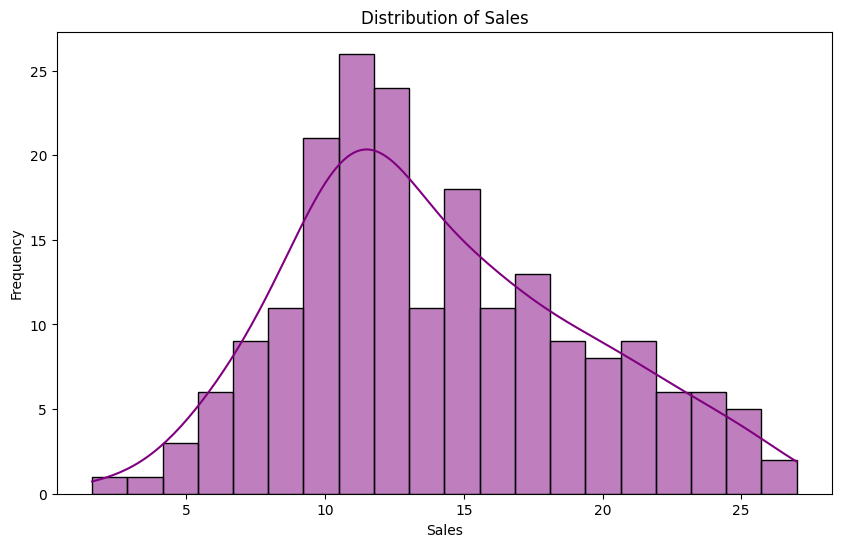

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=20, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


**Visualizing Model Performance**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


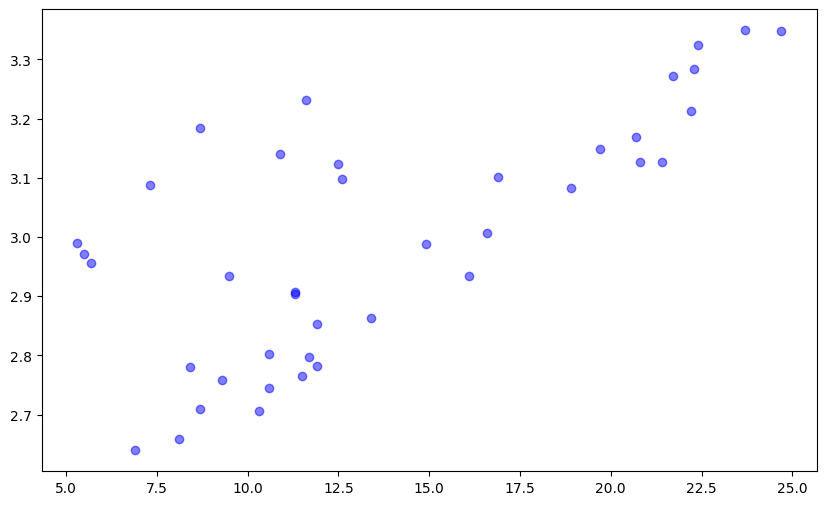

In [31]:
# Trained linear regression model
y_pred_lr = model.predict(X_test_scaled) # Use 'model' instead of 'model_lr'

# Comparing actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
# ... (rest of your plotting code)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


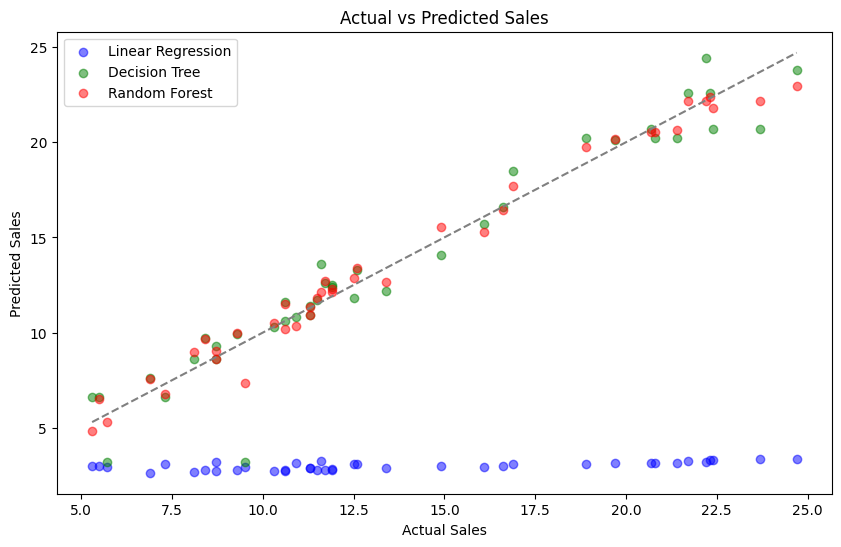

In [32]:
# Trained linear regression model 'model'
y_pred_lr = model.predict(X_test_scaled)  # Use 'model' to predict

# Comparing actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

**Feature Importance Plot (Random Forest)**

<ipython-input-33-72c93942d7ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


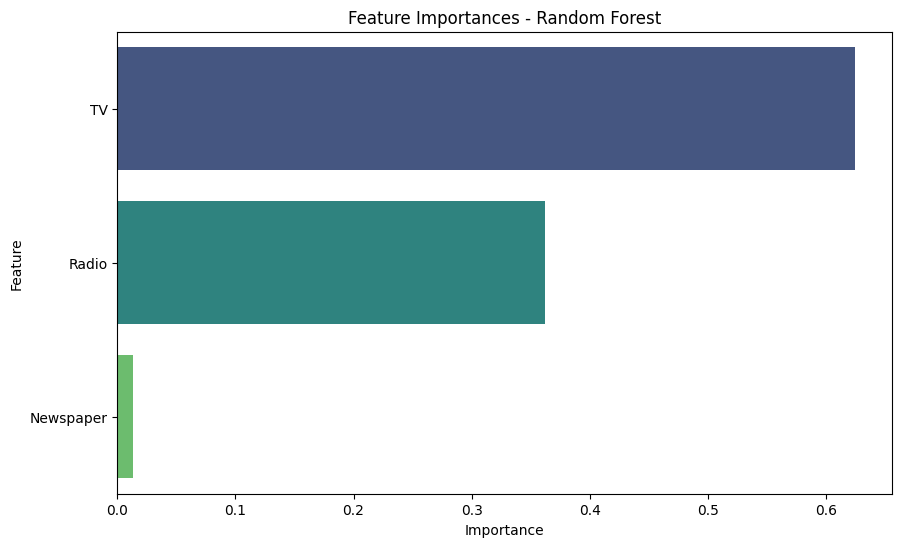

In [33]:
# Plotting feature importances for Random Forest
plt.figure(figsize=(10, 6))
feature_importance = model_rf.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Confusion Matrix (Classification Task)**


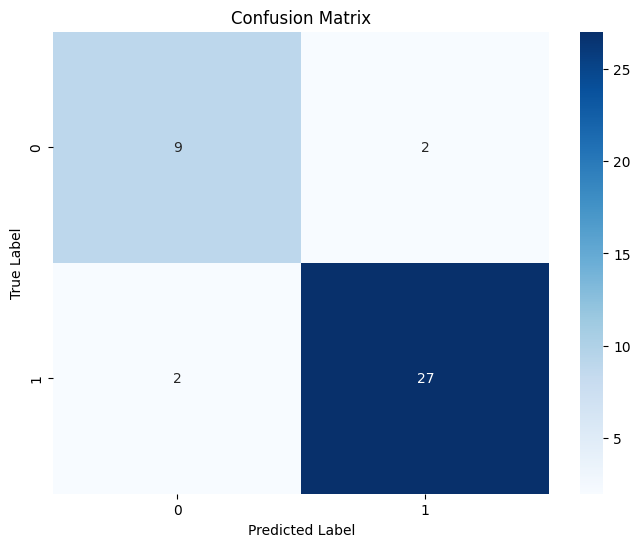

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Adjust the threshold as needed
threshold = 10
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Convert y_test to binary classes based on the same threshold
y_test_class = np.where(y_test > threshold, 1, 0)

conf_matrix = confusion_matrix(y_test_class, y_pred_class) # Both arrays should be binary

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Residual Plot**

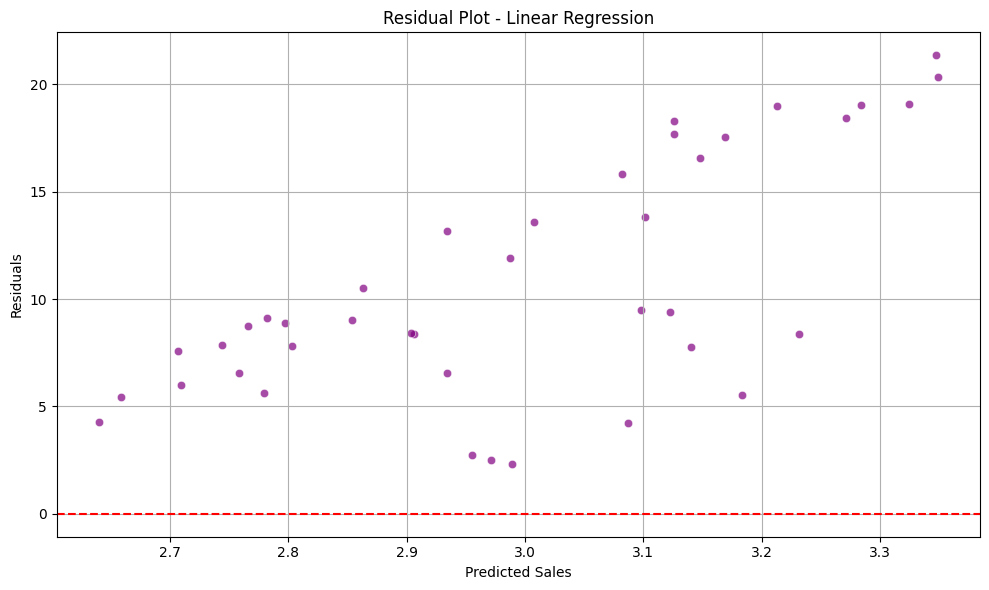

In [35]:
# Visualizing residuals for Linear Regression
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


**Model Comparison Plot**

<ipython-input-39-4f6e534e9922>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='coolwarm')


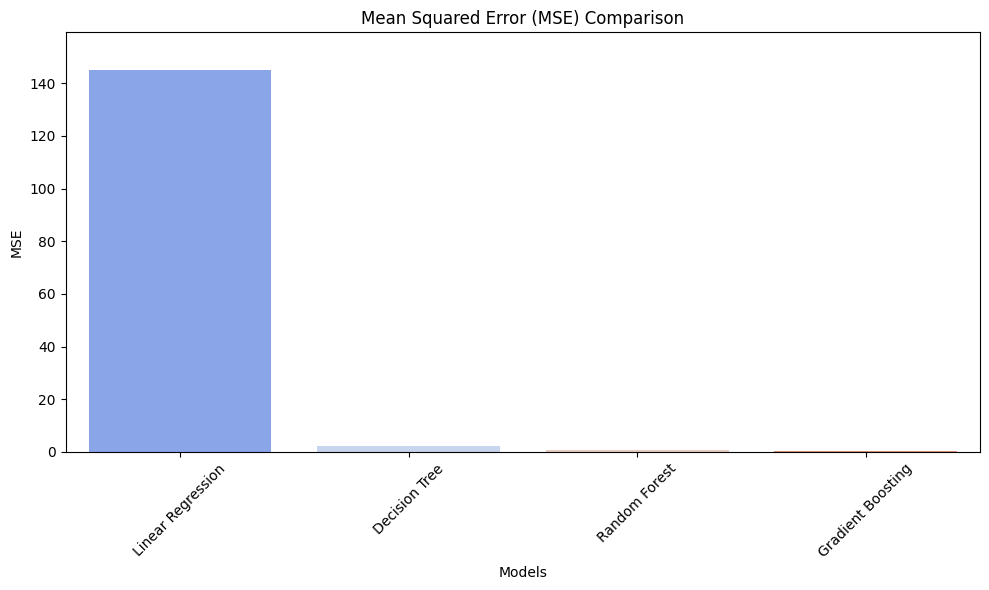

In [39]:
# Comparing model performances using Mean Squared Error
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Assuming you have calculated MSE for other models and y_pred_lr is available
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr) # Calculate MSE for Linear Regression

mse_scores = [mse_lr, mse_dt, mse_rf, mse_gb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_scores, palette='coolwarm')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_scores) * 1.1)  # Adjust y-axis limit for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of Advertising Spend**

<ipython-input-37-705dad84682c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Advertising Spend', data=data, palette='Set3')


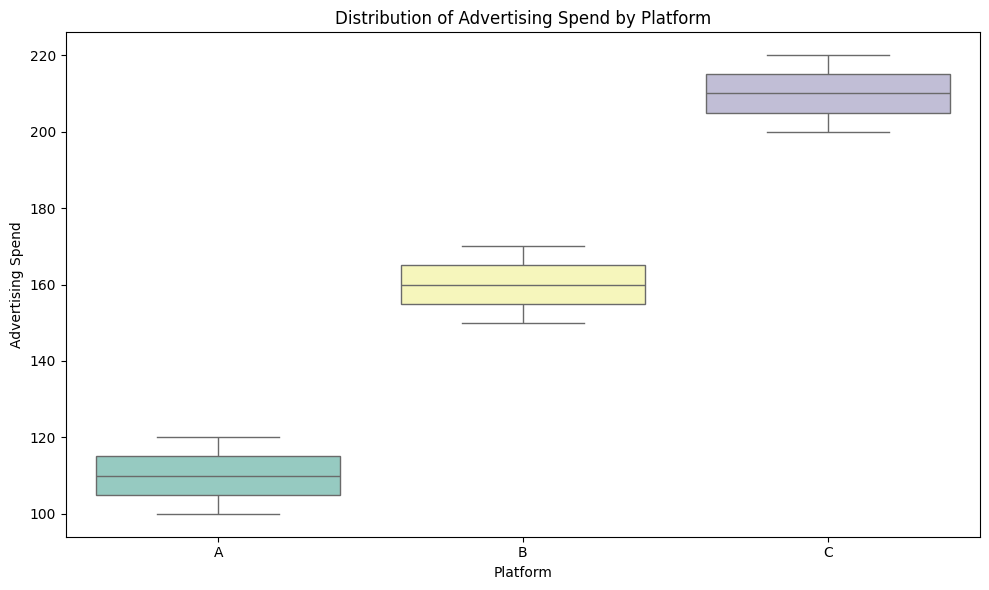

In [37]:
# Visualizing distribution of Advertising Spend by Platform
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({'Platform': ['A', 'B', 'C', 'A', 'B', 'C'],
                     'Advertising Spend': [100, 150, 200, 120, 170, 220]})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Advertising Spend', data=data, palette='Set3')
plt.title('Distribution of Advertising Spend by Platform')
plt.xlabel('Platform')
plt.ylabel('Advertising Spend')
plt.tight_layout()
plt.show()

**Pairplot**

Index(['Platform', 'Advertising Spend'], dtype='object')


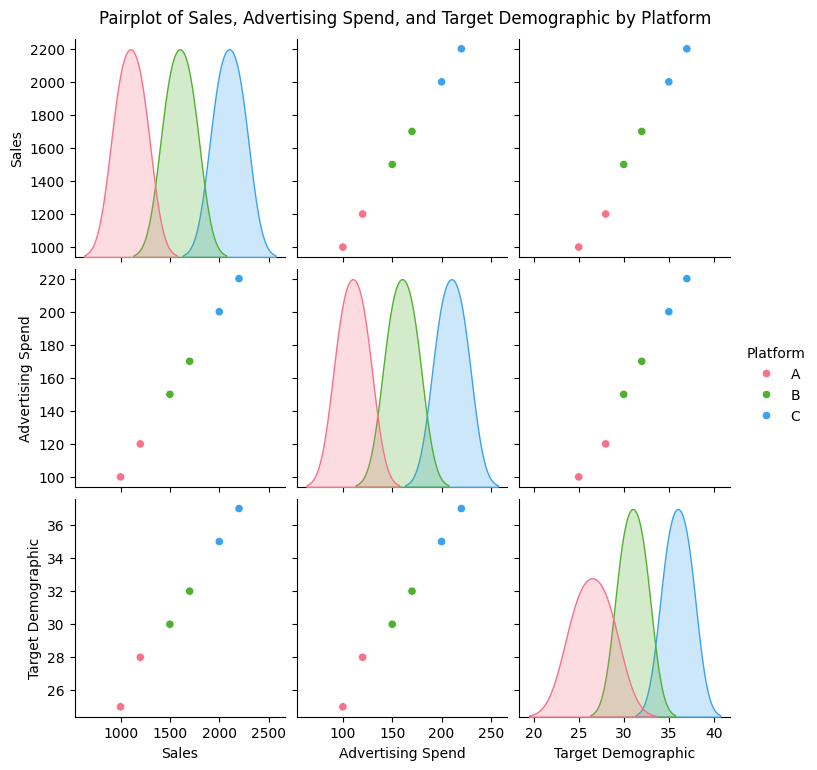

In [38]:
print(data.columns)

data['Sales'] = [1000, 1500, 2000, 1200, 1700, 2200]
data['Target Demographic'] = [25, 30, 35, 28, 32, 37] # Example values, replace as needed

sns.pairplot(data, vars=['Sales', 'Advertising Spend', 'Target Demographic'], hue='Platform', palette='husl')
plt.suptitle('Pairplot of Sales, Advertising Spend, and Target Demographic by Platform', y=1.02)
plt.show()